In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data about individual colleges
college_data = pd.read_csv('data/MERGED2017_18_PP.csv', low_memory = False) # Opens our data into a dataframe

In [3]:
#Shape before cleaning
college_data.shape

(7112, 1977)

In [4]:
college_data = college_data.dropna(axis = 1, how= 'all')
college_data.shape

(7112, 648)

In [5]:
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='PCIP')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='CIP')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='OMA')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='OME')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='RET')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='D150')))]
college_data = college_data[college_data.columns.drop(list(college_data.filter(regex='C150')))]

for col in college_data.columns: 
    print(col)

college_data.shape

import os
out_filepath = os.path.join("data", "cleaned_college_data.csv")
college_data.to_csv(out_filepath, index=False)

UNITID
OPEID
OPEID6
INSTNM
CITY
STABBR
ZIP
ACCREDAGENCY
INSTURL
NPCURL
HCM2
MAIN
NUMBRANCH
PREDDEG
HIGHDEG
CONTROL
ST_FIPS
REGION
LOCALE
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
ANNHI
TRIBAL
AANAPII
HSI
NANTI
MENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
SATVRMID
SATMTMID
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
ACTCMMID
ACTENMID
ACTMTMID
SAT_AVG
SAT_AVG_ALL
DISTANCEONLY
UGDS
UGDS_WHITE
UGDS_BLACK
UGDS_HISP
UGDS_ASIAN
UGDS_AIAN
UGDS_NHPI
UGDS_2MOR
UGDS_NRA
UGDS_UNKN
PPTUG_EF
CURROPER
NPT4_PUB
NPT4_PRIV
NPT41_PUB
NPT42_PUB
NPT43_PUB
NPT44_PUB
NPT45_PUB
NPT41_PRIV
NPT42_PRIV
NPT43_PRIV
NPT44_PRIV
NPT45_PRIV
NPT4_048_PUB
NPT4_048_PRIV
NPT4_3075_PUB
NPT4_3075_PRIV
NPT4_75UP_PUB
NPT4_75UP_PRIV
NUM4_PUB
NUM4_PRIV
NUM41_PUB
NUM42_PUB
NUM43_PUB
NUM44_PUB
NUM45_PUB
NUM41_PRIV
NUM42_PRIV
NUM43_PRIV
NUM44_PRIV
NUM45_PRIV
COSTT4_A
COSTT4_P
TUITIONFEE_IN
TUITIONFEE_OUT
TUITIONFEE_PROG
TUITFTE
INEXPFTE
AVGFACSAL
PFTFAC
PCTPELL
POOLYRS
PFTFTUG1_EF
C200_4
C

In [6]:
college_data[['INSTNM','LO_INC_DEBT_MDN','MD_INC_DEBT_MDN','HI_INC_DEBT_MDN']]

,INSTNM,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN
0,Alabama A & M University,15000,15125,16125
1,University of Alabama at Birmingham,15563,15000,14000
2,Amridge University,10500,18000,25000
3,University of Alabama in Huntsville,16500,14250,12044
4,Alabama State University,19000,19137,16000
...,...,...,...,...
7107,Arizona State University at Yuma,14980,14396,14000
7108,Bay Area Medical Academy - San Jose Satellite ...,8608,PrivacySuppressed,PrivacySuppressed
7109,High Desert Medical College,7521,14181,10519
7110,BCI - Malden,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


In [7]:
salary_data = pd.read_csv('data/FieldOfStudyData1516_1617_PP.csv', low_memory = False) # Opens our data into a dataframe

In [8]:
print(salary_data.shape)
salary_data.head()

(216638, 18)


,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,4.0,NaN
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,31066,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,7.0,6.0
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,8.0
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,15,PrivacySuppressed,PrivacySuppressed,61527,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,9.0,10.0


In [9]:
salary_data = salary_data[~salary_data['MD_EARN_WNE'].isin(['PrivacySuppressed'])] # Remove all rows that contain privacy suppressed
salary_data = salary_data[~salary_data['DEBTMEDIAN'].isin(['PrivacySuppressed'])] # Remove all rows that contain privacy suppressed
salary_data = salary_data[salary_data['CREDDESC'].str.contains('Bachelor')] # Keep all rows that contain bachelor
print(salary_data.shape)
salary_data.head()

(20590, 18)


,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2
15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0
24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0
28,100654.0,1002,Alabama A & M University,Public,1,1419,Mechanical Engineering.,3,Bachelors Degree,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0
37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

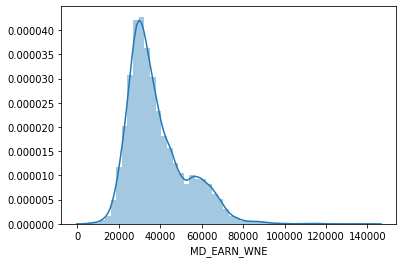

In [11]:
sns.distplot(salary_data["MD_EARN_WNE"]) # Graph of average earnings 1 year out of college

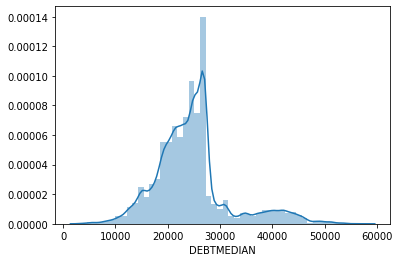

In [12]:
sns.distplot(salary_data["DEBTMEDIAN"]) # Graph of median college debt after graduating college

In [13]:
import os
out_filepath = os.path.join("data", "cleaned_salary_data.csv")
salary_data.to_csv(out_filepath, index=False)

In [14]:
location_data = college_data[['INSTNM', 'ST_FIPS', 'STABBR', 'LATITUDE', 'LONGITUDE', 'SAT_AVG']]
location_data = location_data.dropna()
location_data.head()

,INSTNM,ST_FIPS,STABBR,LATITUDE,LONGITUDE,SAT_AVG
0,Alabama A & M University,1,AL,34.783368,-86.568502,929.0
1,University of Alabama at Birmingham,1,AL,33.505697,-86.799345,1195.0
3,University of Alabama in Huntsville,1,AL,34.724557,-86.640449,1322.0
4,Alabama State University,1,AL,32.364317,-86.295677,935.0
5,The University of Alabama,1,AL,33.211875,-87.545978,1278.0


In [15]:
salary_data['MD_EARN_WNE'] = salary_data['MD_EARN_WNE'].str.extract('(\d+)').astype(int)
salary_data['DEBTMEDIAN'] = salary_data['DEBTMEDIAN'].str.extract('(\d+)').astype(int)

salary_data['BESTVALUE'] = salary_data['MD_EARN_WNE']/salary_data['DEBTMEDIAN']


In [16]:
salary_data.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,BESTVALUE
15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0,1.497931
24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0,0.806221
27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0,1.565687
28,100654.0,1002,Alabama A & M University,Public,1,1419,Mechanical Engineering.,3,Bachelors Degree,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0,1.240251
37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0,0.801175


In [17]:
combined_data = pd.merge(location_data, salary_data, on='INSTNM')
combined_data.head()
combined_data.sort_values(by=['BESTVALUE', 'STABBR'], ascending=False)

,INSTNM,ST_FIPS,STABBR,LATITUDE,LONGITUDE,SAT_AVG,UNITID,OPEID6,CONTROL,MAIN,...,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,BESTVALUE
5750,Massachusetts Institute of Technology,25,MA,42.359243,-71.093226,1532.0,166683.0,2178,"Private, nonprofit",1,...,30,8219,85,12251,25,23,120300,122.0,112.0,14.636817
9434,Duke University,37,NC,36.001135,-78.937624,1488.0,198419.0,2920,"Private, nonprofit",1,...,25,5500,57,7387,31,27,74700,58.0,60.0,13.581818
9425,Duke University,37,NC,36.001135,-78.937624,1488.0,198419.0,2920,"Private, nonprofit",1,...,98,7890,82,9795,111,109,99600,175.0,230.0,12.623574
13245,The University of Texas Rio Grande Valley,48,TX,26.306759,-98.173567,1020.0,227368.0,3599,Public,1,...,25,3750,39,4426,PrivacySuppressed,PrivacySuppressed,42700,33.0,12.0,11.386667
12130,Brown University,44,RI,41.826170,-71.403850,1494.0,217156.0,3401,"Private, nonprofit",1,...,68,12871,134,12972,62,59,141100,124.0,144.0,10.962629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10057,Central State University,39,OH,39.715787,-83.880186,868.0,201690.0,3026,Public,1,...,27,41944,435,39639,36,35,19100,25.0,10.0,0.455369
12682,Memphis College of Art,47,TN,35.145929,-89.993761,1125.0,220808.0,3507,"Private, nonprofit",1,...,39,42750,444,39758,43,41,17300,29.0,20.0,0.404678
9337,School of Visual Arts,36,NY,40.738809,-73.982359,1139.0,197151.0,7468,"Private, for-profit",1,...,69,27000,280,25547,59,50,10200,46.0,60.0,0.377778
9525,Livingstone College,37,NC,35.670877,-80.483956,822.0,198862.0,2942,"Private, nonprofit",1,...,20,44250,459,41367,34,33,14500,20.0,15.0,0.327684


In [18]:
out_filepath = os.path.join("data", "best_value_data.csv")
combined_data.to_csv(out_filepath, index=False)

Link to map that shows "Best value" schools
https://datastudio.google.com/open/1UYDnVQdFf6_hKf1z2TgFMWtHsNvXl8s6

Link to table that shows debt and earnings for schools
https://datastudio.google.com/open/1g6G-O8LygSsjNdDV32BJNbLDH6IjJqIA

In [19]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [20]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [21]:
clf.predict([[2., 2.]])

array([1])

In [22]:
features = ['CIPCODE', 'ST_FIPS', 'SAT_AVG']
combined_data = combined_data.dropna()
X = combined_data[features]
y = combined_data[['MD_EARN_WNE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# predict = clf.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
# lm = linear_model.LinearRegression()
# lm.fit(X_train, y_train)
# model = lm.fit(X_train, y_train)
# predictions = lm.predict(X_test)

/Users/seanbarber/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


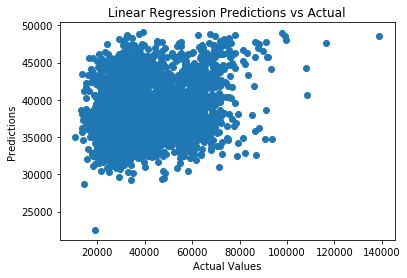

array([[36901866.82655858]])

In [25]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.title("Linear Regression Predictions vs Actual")
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()
lm.predict([[1107, 16, 1500]])

In [26]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 5), random_state=1)

clf.fit(X_train, y_train.values.ravel())


/Users/seanbarber/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

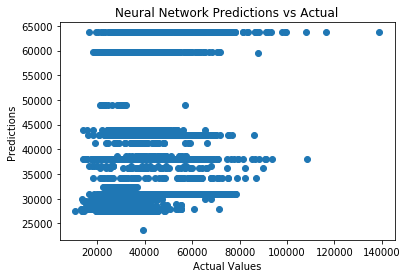

In [27]:
predictions = clf.predict(X_test)

plt.title("Neural Network Predictions vs Actual")
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()

In [28]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_train)
NN.predict(X_test)
round(NN.score(X,y), 4)

/Users/seanbarber/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0059

In [29]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [30]:
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [35]:
print(college_data.shape)
columnsToRemove = ["PREDDEG","HIGHDEG","DISTANCEONLY","PPTUG_EF","CURROPER","NUM4_PUB","NUM4_PRIV","NUM41_PUB","NUM42_PUB","NUM43_PUB","NUM44_PUB","NUM45_PUB","NUM41_PRIV","NUM42_PRIV","NUM43_PRIV","NUM44_PRIV","NUM45_PRIV","POOLYRS","C200_4","C200_L4","D200_4","D200_L4","C200_4_POOLED","C200_L4_POOLED","POOLYRS200","D200_4_POOLED","D200_L4_POOLED","CDR3","C200_L4_POOLED_SUPP","C200_4_POOLED_SUPP","ALIAS","C100_4","D100_4","C100_L4","D100_L4","TRANS_4","DTRANS_4","TRANS_L4","DTRANS_L4","CDR3_DENOM","T4APPROVALDATE","OPENADMP","UGNONDS","ACCREDCODE","TRANS_4_POOLED","TRANS_L4_POOLED","DTRANS_4_POOLED","DTRANS_L4_POOLED","TRANS_4_POOLED_SUPP","TRANS_L4_POOLED_SUPP","C100_4_POOLED","C100_L4_POOLED","D100_4_POOLED","D100_L4_POOLED","POOLYRS100","C100_4_POOLED_SUPP","C100_L4_POOLED_SUPP","POOLYRSOM_FTFT","POOLYRSOM_PTFT","POOLYRSOM_FTNFT","POOLYRSOM_PTNFT","SCHTYPE","OPEFLAG","PRGMOFR","MTHCMP1","MTHCMP2","MTHCMP3","MTHCMP4","MTHCMP5","MTHCMP6","POOLYRSOM_ALL","POOLYRSOM_FIRSTTIME","POOLYRSOM_NOTFIRSTTIME","POOLYRSOM_FULLTIME","POOLYRSOM_PARTTIME"]

for column in columnsToRemove:
    college_data = college_data[college_data.columns.drop(list(college_data.filter(regex=column)))]

for col in college_data.columns: 
    print(col)
print(college_data.shape)
college_data.head

(0, 127)
UNITID
OPEID
OPEID6
INSTNM
CITY
STABBR
ZIP
ACCREDAGENCY
INSTURL
NPCURL
HCM2
MAIN
NUMBRANCH
CONTROL
ST_FIPS
REGION
LOCALE
LATITUDE
LONGITUDE
CCBASIC
CCUGPROF
CCSIZSET
HBCU
PBI
ANNHI
TRIBAL
AANAPII
HSI
NANTI
MENONLY
RELAFFIL
ADM_RATE
ADM_RATE_ALL
SATVR25
SATVR75
SATMT25
SATMT75
SATVRMID
SATMTMID
ACTCM25
ACTCM75
ACTEN25
ACTEN75
ACTMT25
ACTMT75
ACTCMMID
ACTENMID
ACTMTMID
SAT_AVG
SAT_AVG_ALL
UGDS
UGDS_WHITE
UGDS_BLACK
UGDS_HISP
UGDS_ASIAN
UGDS_AIAN
UGDS_NHPI
UGDS_2MOR
UGDS_NRA
UGDS_UNKN
NPT4_PUB
NPT4_PRIV
NPT41_PUB
NPT42_PUB
NPT43_PUB
NPT44_PUB
NPT45_PUB
NPT41_PRIV
NPT42_PRIV
NPT43_PRIV
NPT44_PRIV
NPT45_PRIV
NPT4_048_PUB
NPT4_048_PRIV
NPT4_3075_PUB
NPT4_3075_PRIV
NPT4_75UP_PUB
NPT4_75UP_PRIV
COSTT4_A
COSTT4_P
TUITIONFEE_IN
TUITIONFEE_OUT
TUITIONFEE_PROG
TUITFTE
INEXPFTE
AVGFACSAL
PFTFAC
PCTPELL
PFTFTUG1_EF
PCTFLOAN
UG25ABV
DEBT_MDN
GRAD_DEBT_MDN
WDRAW_DEBT_MDN
LO_INC_DEBT_MDN
MD_INC_DEBT_MDN
HI_INC_DEBT_MDN
DEP_DEBT_MDN
IND_DEBT_MDN
PELL_DEBT_MDN
NOPELL_DEBT_MDN
FEMALE_DEBT_MDN
MAL

<bound method NDFrame.head of Empty DataFrame
Columns: [UNITID, OPEID, OPEID6, INSTNM, CITY, STABBR, ZIP, ACCREDAGENCY, INSTURL, NPCURL, HCM2, MAIN, NUMBRANCH, CONTROL, ST_FIPS, REGION, LOCALE, LATITUDE, LONGITUDE, CCBASIC, CCUGPROF, CCSIZSET, HBCU, PBI, ANNHI, TRIBAL, AANAPII, HSI, NANTI, MENONLY, RELAFFIL, ADM_RATE, ADM_RATE_ALL, SATVR25, SATVR75, SATMT25, SATMT75, SATVRMID, SATMTMID, ACTCM25, ACTCM75, ACTEN25, ACTEN75, ACTMT25, ACTMT75, ACTCMMID, ACTENMID, ACTMTMID, SAT_AVG, SAT_AVG_ALL, UGDS, UGDS_WHITE, UGDS_BLACK, UGDS_HISP, UGDS_ASIAN, UGDS_AIAN, UGDS_NHPI, UGDS_2MOR, UGDS_NRA, UGDS_UNKN, NPT4_PUB, NPT4_PRIV, NPT41_PUB, NPT42_PUB, NPT43_PUB, NPT44_PUB, NPT45_PUB, NPT41_PRIV, NPT42_PRIV, NPT43_PRIV, NPT44_PRIV, NPT45_PRIV, NPT4_048_PUB, NPT4_048_PRIV, NPT4_3075_PUB, NPT4_3075_PRIV, NPT4_75UP_PUB, NPT4_75UP_PRIV, COSTT4_A, COSTT4_P, TUITIONFEE_IN, TUITIONFEE_OUT, TUITIONFEE_PROG, TUITFTE, INEXPFTE, AVGFACSAL, PFTFAC, PCTPELL, PFTFTUG1_EF, PCTFLOAN, UG25ABV, DEBT_MDN, GRAD_DEBT_MDN

In [ ]:
college_data = college_data.dropna()